# Minimal Model for the Housing dataset

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from Helpers import EDA_helper_fns as hf # custom made helper functions

In [5]:
# Read data
housing_train = pd.read_csv('train.csv', sep=',', index_col='Id')
housing_test = pd.read_csv('test.csv', sep=',', index_col='Id')

features = housing_train.columns

## Feature selection

### Select target variable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 1 columns):
SalePrice_log    1460 non-null float64
dtypes: float64(1)
memory usage: 45.6 KB
SalePrice_log is continuous
               SalePrice_log  SalePrice
SalePrice_log       1.000000   0.948374
SalePrice           0.948374   1.000000


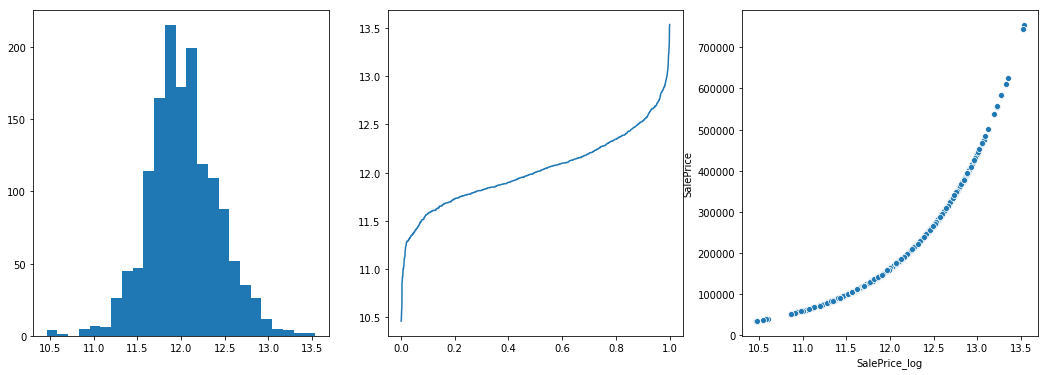

In [6]:
housing_train["SalePrice_SF"] = housing_train["SalePrice"]/housing_train["GrLivArea"]
housing_train["SalePrice_Misc_SF"] = (housing_train["SalePrice"]-housing_train["MiscVal"])/housing_train["GrLivArea"]
housing_train["LogSP_Misc_SF"] = np.log(housing_train["SalePrice_Misc_SF"])
housing_train["SalePrice_log"] = np.log(housing_train["SalePrice"])

hf.analyzefeature(housing_train, housing_test, "SalePrice_log")
Y_train = housing_train[["SalePrice_log"]]

### Select feature variables

C:\Program Files\Python36\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Program Files\Python36\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files\Python36\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 1 columns):
MasVnrArea_log    1158 non-null float64
dtypes: float64(1)
memory usage: 45.6 KB
MasVnrArea_log is continuous
                MasVnrArea_log  SalePrice
MasVnrArea_log        1.000000   0.350173
SalePrice             0.350173   1.000000


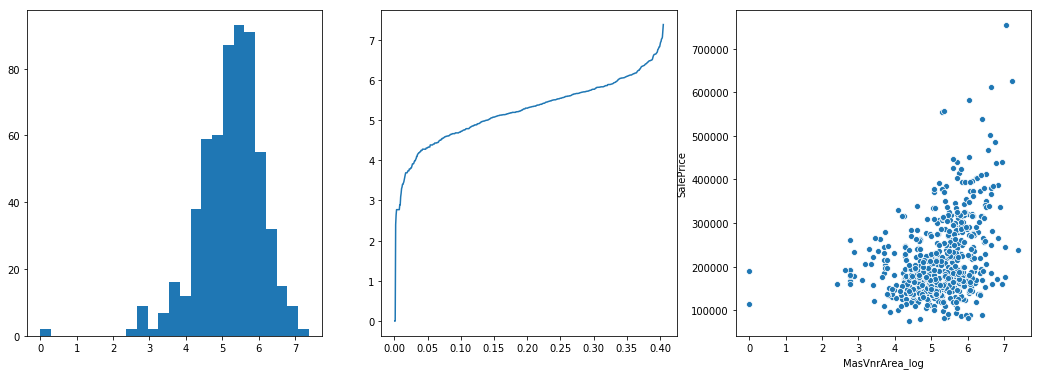

False

In [7]:
# Convert building/renovation year to age
housing_train["Age"] = housing_train["YrSold"] - housing_train["YearBuilt"]
housing_test["Age"] = housing_test["YrSold"] - housing_test["YearBuilt"]
housing_train["LogLotFrontage"] = np.log(housing_train["LotFrontage"])
housing_test["LogLotFrontage"] = np.log(housing_test["LotFrontage"])
housing_train["LogLotArea"] = np.log(housing_train["LotArea"])
housing_test["LogLotArea"] = np.log(housing_test["LotArea"])
housing_train["MasVnrArea_log"]=hf.safelog(np.array(housing_train["MasVnrArea"]),2)
housing_test["MasVnrArea_log"]=hf.safelog(np.array(housing_test["MasVnrArea"]),2)

hf.analyzefeature(housing_train, housing_test, "MasVnrArea_log")

Only continuous features included in the model

In [8]:
cont_features = ["GrLivArea", "OverallQual", "OverallCond", "TotalBsmtSF", "TotRmsAbvGrd", "GarageArea", 
                 "MiscVal", "LogLotFrontage", "LogLotArea", "MasVnrArea_log", "WoodDeckSF", "PoolArea"]

X_train = housing_train[cont_features]
X_test = housing_test[cont_features]

#Impute missing values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

C:\Program Files\Python36\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


### Normalize continuous features

In [9]:
X_train_sc = pd.DataFrame(scale(X_train), columns=cont_features, index=X_train.index)
X_test_sc = pd.DataFrame(scale(X_test), columns=cont_features, index=X_test.index)

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [10]:
X_train_sc.info()
X_test_sc.info()
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 12 columns):
GrLivArea         1460 non-null float64
OverallQual       1460 non-null float64
OverallCond       1460 non-null float64
TotalBsmtSF       1460 non-null float64
TotRmsAbvGrd      1460 non-null float64
GarageArea        1460 non-null float64
MiscVal           1460 non-null float64
LogLotFrontage    1460 non-null float64
LogLotArea        1460 non-null float64
MasVnrArea_log    1460 non-null float64
WoodDeckSF        1460 non-null float64
PoolArea          1460 non-null float64
dtypes: float64(12)
memory usage: 148.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 12 columns):
GrLivArea         1459 non-null float64
OverallQual       1459 non-null float64
OverallCond       1459 non-null float64
TotalBsmtSF       1459 non-null float64
TotRmsAbvGrd      1459 non-null float64
GarageArea        1459 non-null float64
MiscVal           14

## Train model

### split train data to train and cv sets

score= 2.921888175102009
(292,)
(292,)
score= 3.0276456076661


C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(292,)
(292,)
score= 2.797030637429844


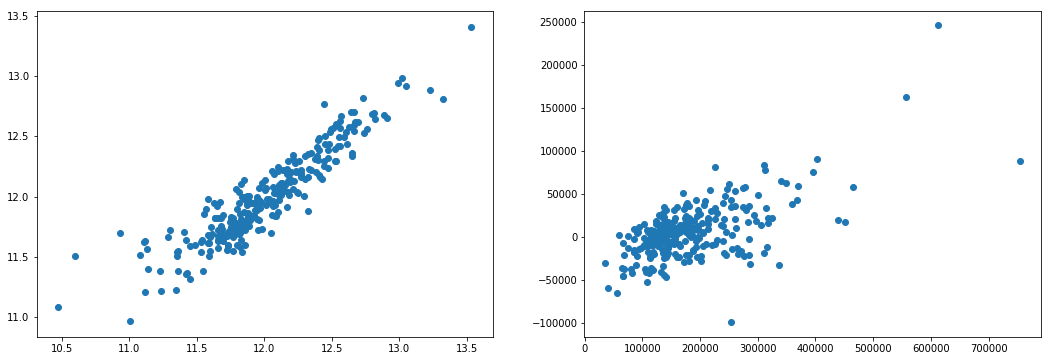

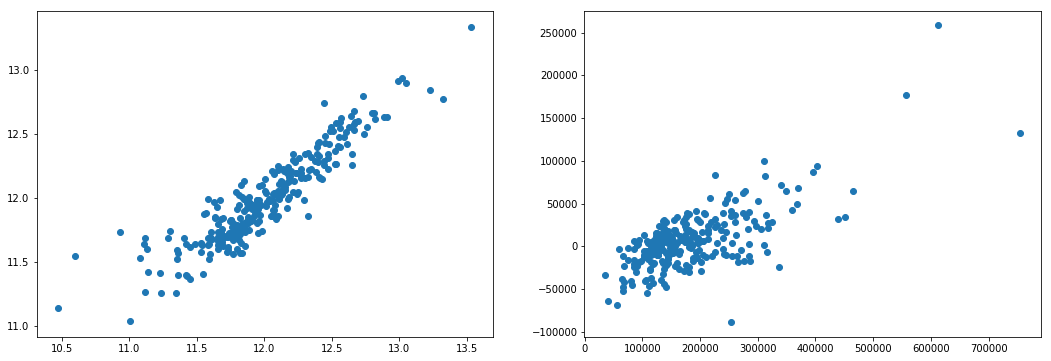

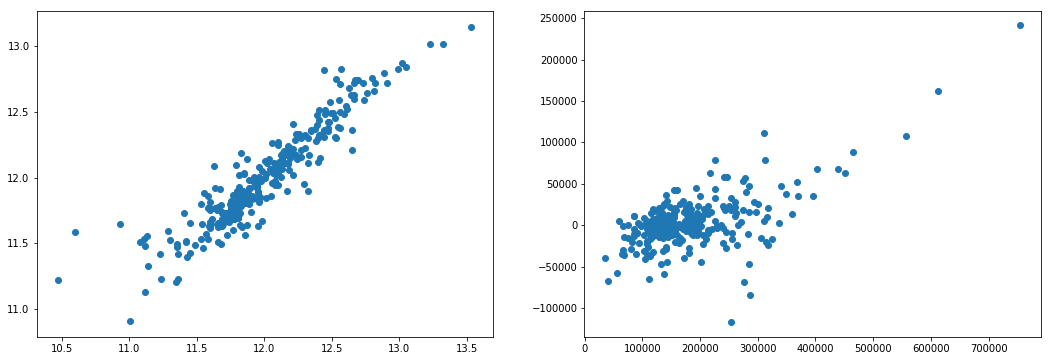

In [11]:
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train_sc, Y_train, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_tr,y_tr)
reg.score(X_cv,y_cv)

y_pred = reg.predict(X_cv)

ind_tr = np.array(X_tr.index)
ind_cv = np.array(X_cv.index)
y_pred_tot = np.exp(y_pred) #*np.array((housing_train[["GrLivArea"]].loc[ind_cv])) +np.array(housing_train[["MiscVal"]].loc[ind_cv])
y_cv_tot = np.array(np.exp(y_cv)) #*np.array(housing_train[["GrLivArea"]].loc[ind_cv]) +np.array(housing_train[["MiscVal"]].loc[ind_cv])

# Residual plots
fig, axes = plt.subplots(1,2, figsize=(18, 6))
axes[0].scatter(y_cv, y_pred)
axes[1].scatter(y_cv_tot, y_cv_tot-y_pred_tot)

score2 = np.sqrt(np.sum(np.square(np.log(y_pred_tot)-np.log(y_cv_tot))))
print("score=", score2)


reg2 = Lasso(alpha=0.01, tol=0.001)
reg2.fit(X_tr,y_tr)
reg2.score(X_cv,y_cv)

y_pred = reg2.predict(X_cv)

ind_tr = np.array(X_tr.index)
ind_cv = np.array(X_cv.index)
y_pred_tot = np.exp(y_pred) #*np.array((housing_train[["GrLivArea"]].loc[ind_cv])) +np.array(housing_train[["MiscVal"]].loc[ind_cv])
y_cv_tot = np.array(np.exp(y_cv)).ravel() #*np.array(housing_train[["GrLivArea"]].loc[ind_cv]) +np.array(housing_train[["MiscVal"]].loc[ind_cv])

print(y_pred_tot.shape)
print(y_cv_tot.shape)

# Residual plots
fig, axes = plt.subplots(1,2, figsize=(18, 6))
axes[0].scatter(y_cv, y_pred)
axes[1].scatter(y_cv_tot, y_cv_tot-y_pred_tot)

score2 = np.sqrt(np.sum(np.square(np.log(y_pred_tot)-np.log(y_cv_tot))))
print("score=", score2)


rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_tr, y_tr)
rf.score(X_cv,y_cv)

y_pred = rf.predict(X_cv)

ind_tr = np.array(X_tr.index)
ind_cv = np.array(X_cv.index)
y_pred_tot = np.exp(y_pred) #*np.array((housing_train[["GrLivArea"]].loc[ind_cv])) +np.array(housing_train[["MiscVal"]].loc[ind_cv])
y_cv_tot = np.array(np.exp(y_cv)).ravel() #*np.array(housing_train[["GrLivArea"]].loc[ind_cv]) +np.array(housing_train[["MiscVal"]].loc[ind_cv])

print(y_pred_tot.shape)
print(y_cv_tot.shape)

# Residual plots
fig, axes = plt.subplots(1,2, figsize=(18, 6))
axes[0].scatter(y_cv, y_pred)
axes[1].scatter(y_cv_tot, y_cv_tot-y_pred_tot)

score2 = np.sqrt(np.sum(np.square(np.log(y_pred_tot)-np.log(y_cv_tot))))
print("score=", score2)

OverallQual    0.574962
GrLivArea      0.146547
TotalBsmtSF    0.090539
GarageArea     0.078426
LogLotArea     0.037557
dtype: float64


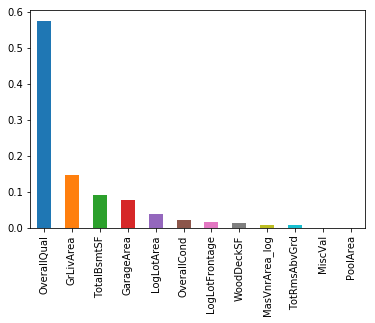

In [12]:
features = X_train.columns
feature_imp = pd.Series(rf.feature_importances_,
                        index=features).sort_values(ascending=False)
print(feature_imp.head())
plt.figure(2)
feature_imp.plot.bar()

# Improve Baseline model

## Include categorical variables

In [13]:
def categorize(df_train, df_test, feature, bns=3, lbls=['1','2','3'], method="mean", fillna=False):
    """ Categorize the elements of a continuous feature into discrete categories.
    Inputs:
        df_train: DataFrame: training data: aggregated by "SalePrice"
        df_test:  DataFrame: test data: no "SalePrice" is available,
                   categorization is performed according to the training data.
        feature:  str: Specific column to categorize
        bns: integer: number of categories
        lbls: list of labels, num. elements equal to bns
        method: aggregation method. Default: "mean"
        fillna: replace missing values with most probable values: True/False
    Returns:
        feature_tr: transformed training set
        feature_tr_test: trasformed test set: "SalePrice"    
    """
    temp = df_train[[feature, "SalePrice"]].groupby(feature).agg(method)
    tr, bins = pd.cut(temp["SalePrice"], bins=bns, labels=lbls, retbins=True)
    fna = tr.value_counts().idxmax()
    if fillna:
        feature_tr = df_train[feature].map(tr).fillna(fna).astype(str)
        feature_tr_test = df_test[feature].map(tr).fillna(fna).astype(str)
    else:
        feature_tr = df_train[feature].map(tr).astype(str)
        feature_tr_test = df_test[feature].map(tr).astype(str)
    return feature_tr, feature_tr_test

In [14]:
housing_train["Neighborhood_tr"], housing_test["Neighborhood_tr"] = categorize(housing_train, housing_test, "Neighborhood", lbls=['Poor', 'Med', 'Rich'], fillna=True)
housing_train["MasVnrType_tr"], housing_test["MasVnrType_tr"]  = categorize(housing_train, housing_test, "MasVnrType", lbls=['Cat1', 'Cat2', 'Cat3'], fillna=True)
housing_train["ExterCond_tr"], housing_test["ExterCond_tr"]  = categorize(housing_train, housing_test, "ExterCond", bns=2, lbls=['Bad', 'Good'], fillna=True)
housing_train["BsmtQual_tr"], housing_test["BsmtQual_tr"]  = categorize(housing_train, housing_test, "BsmtQual", bns=3, lbls=['BelAv', 'Avg', 'Good'], fillna=False)
housing_train["BsmtFinType1_tr"], housing_test["BsmtFinType1_tr"]  = categorize(housing_train, housing_test, "BsmtFinType1", bns=2, lbls=['Avg', 'Good'], fillna=False)
housing_train["HeatingQC_tr"], housing_test["HeatingQC_tr"]  = categorize(housing_train, housing_test, "HeatingQC", bns=2, lbls=['Avg', 'Ex'], fillna=False)
housing_train["TotRooms_tr"], housing_test["TotRooms_tr"]  = categorize(housing_train, housing_test, "TotRmsAbvGrd", bns=3, lbls=['Few', 'Avg', 'Many'], fillna=True)
housing_train["GarageCars_tr"], housing_test["GarageCars_tr"]  = categorize(housing_train, housing_test, "GarageCars", bns=3, lbls=['Few', 'Some', 'Many'], fillna=True)
housing_train["Pool_tr"], housing_test["Pool_tr"]  = categorize(housing_train, housing_test, "PoolQC", bns=2, lbls=['No_Bad', 'Ex'], fillna=True)
housing_train["SaleType_tr"], housing_test["SaleType_tr"]  = categorize(housing_train, housing_test, "SaleType", bns=3, lbls=['Typ1', 'Typ2', 'Typ3'], fillna=True)

In [15]:
# Convert dummy features to string
def conv_to_dum(df, cols_to_dummies):
    df[cols_to_dummies] = df[cols_to_dummies].apply(lambda row: row.astype(str))
    # Get dummies for specific features
    dummies = pd.get_dummies(df[cols_to_dummies])
    return dummies

In [16]:
cols_to_dummies = ["Neighborhood_tr", "MasVnrType_tr", "ExterCond_tr", "BsmtQual_tr",
           "BsmtFinType1_tr", "HeatingQC_tr", "TotRooms_tr", "GarageCars_tr", 
           "Pool_tr", "SaleType_tr", "ExterQual", "KitchenQual"]
dummies_train = conv_to_dum(housing_train, cols_to_dummies)
dummies_test = conv_to_dum(housing_test, cols_to_dummies)



In [17]:
# Transform continuous features
housing_train["Age"] = housing_train["YrSold"] - housing_train["YearBuilt"]
housing_test["Age"] = housing_test["YrSold"] - housing_test["YearBuilt"]
housing_train["LogLotFrontage"] = np.log(housing_train["LotFrontage"])
housing_test["LogLotFrontage"] = np.log(housing_test["LotFrontage"])
housing_train["LogLotArea"] = np.log(housing_train["LotArea"])
housing_test["LogLotArea"] = np.log(housing_test["LotArea"])
housing_train["MasVnrArea_log"]=hf.safelog(np.array(housing_train["MasVnrArea"]),2)
housing_test["MasVnrArea_log"]=hf.safelog(np.array(housing_test["MasVnrArea"]),2)

cont_features = ["GrLivArea", "OverallQual", "OverallCond", "TotalBsmtSF", "TotRmsAbvGrd", "GarageArea", 
                 "MiscVal", "LogLotFrontage", "LogLotArea", "MasVnrArea_log", "WoodDeckSF", "PoolArea"]

X_train_cont = housing_train[cont_features]
X_test_cont = housing_test[cont_features]

#Impute missing values with 0
X_train_cont.fillna(0, inplace=True)
X_test_cont.fillna(0, inplace=True)

X_train_sc = pd.DataFrame(scale(X_train), columns=cont_features, index=X_train.index)
X_test_sc = pd.DataFrame(scale(X_test), columns=cont_features, index=X_test.index)

C:\Program Files\Python36\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Program Files\Python36\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


In [18]:
X_train_sc.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,TotRmsAbvGrd,GarageArea,MiscVal,LogLotFrontage,LogLotArea,MasVnrArea_log,WoodDeckSF,PoolArea
Id,,,,,,,,,,,,
1,0.370333,0.651479,-0.517200,-0.459303,0.912210,0.351000,-0.087688,0.445180,-0.133231,1.204192,-0.752176,-0.068692
2,-0.482512,-0.071836,2.179628,0.466465,-0.318683,-0.060731,-0.087688,0.572361,0.113442,-0.805930,1.626195,-0.068692
3,0.515013,0.651479,-0.517200,-0.313369,-0.318683,0.631726,-0.087688,0.472817,0.420061,1.131635,-0.752176,-0.068692
4,0.383659,0.651479,-0.517200,-0.687324,0.296763,0.790804,-0.087688,0.396154,0.103347,-0.805930,-0.752176,-0.068692
5,1.299326,1.374795,-0.517200,0.199680,1.527656,1.698485,-0.087688,0.602245,0.878409,1.425011,0.780197,-0.068692


In [19]:
dummies_train.head()

,Neighborhood_tr_Med,Neighborhood_tr_Poor,Neighborhood_tr_Rich,MasVnrType_tr_Cat1,MasVnrType_tr_Cat2,MasVnrType_tr_Cat3,ExterCond_tr_Bad,ExterCond_tr_Good,BsmtQual_tr_Avg,BsmtQual_tr_BelAv,...,SaleType_tr_Typ2,SaleType_tr_Typ3,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
5,0,0,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0


In [20]:
X_train = pd.concat([X_train_sc, dummies_train], axis=1, join_axes=[X_train_sc.index])
X_test = pd.concat([X_test_sc, dummies_test], axis=1, join_axes=[X_test_sc.index])
X_train["KitchenQual_nan"] = 0

In [21]:
print(X_test.columns)
print(X_train.columns)

Index(['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       'TotRmsAbvGrd', 'GarageArea', 'MiscVal', 'LogLotFrontage', 'LogLotArea',
       'MasVnrArea_log', 'WoodDeckSF', 'PoolArea', 'Neighborhood_tr_Med',
       'Neighborhood_tr_Poor', 'Neighborhood_tr_Rich', 'MasVnrType_tr_Cat1',
       'MasVnrType_tr_Cat2', 'MasVnrType_tr_Cat3', 'ExterCond_tr_Bad',
       'ExterCond_tr_Good', 'BsmtQual_tr_Avg', 'BsmtQual_tr_BelAv',
       'BsmtQual_tr_Good', 'BsmtQual_tr_nan', 'BsmtFinType1_tr_Avg',
       'BsmtFinType1_tr_Good', 'BsmtFinType1_tr_nan', 'HeatingQC_tr_Avg',
       'HeatingQC_tr_Ex', 'TotRooms_tr_Avg', 'TotRooms_tr_Few',
       'TotRooms_tr_Many', 'GarageCars_tr_Few', 'GarageCars_tr_Many',
       'GarageCars_tr_Some', 'Pool_tr_Ex', 'Pool_tr_No_Bad',
       'SaleType_tr_Typ1', 'SaleType_tr_Typ2', 'SaleType_tr_Typ3',
       'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Ki

score= 0.10811842453185018
(292,)
(292,)
score= 0.10699819858375183


C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(292,)
(292,)
score= 0.10348459858612946


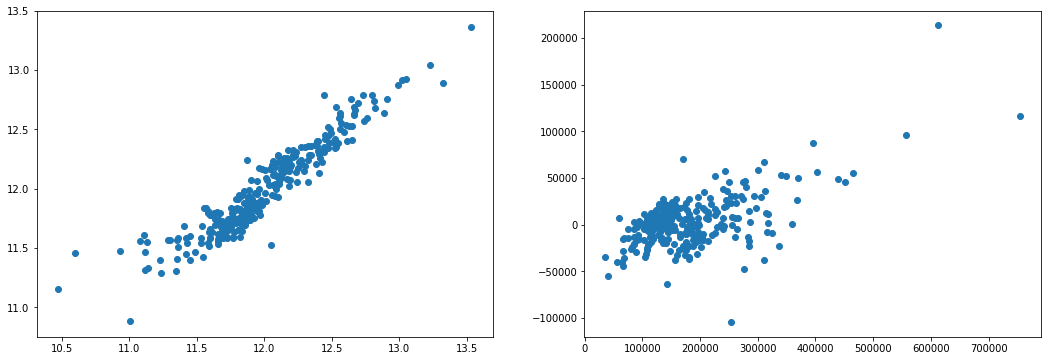

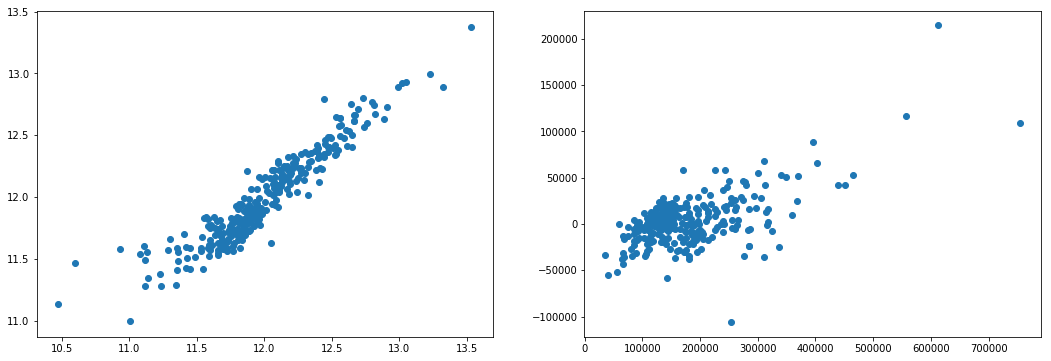

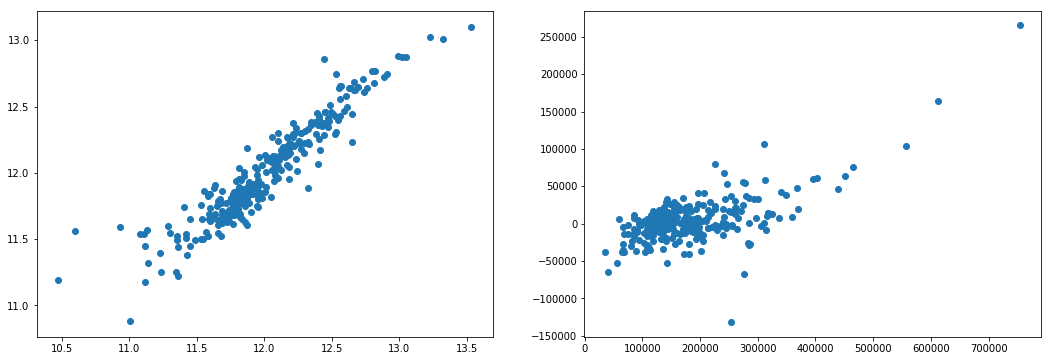

In [22]:
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_tr,y_tr)
reg.score(X_cv,y_cv)

y_pred = reg.predict(X_cv)

ind_tr = np.array(X_tr.index)
ind_cv = np.array(X_cv.index)
y_pred_tot = np.exp(y_pred) #*np.array((housing_train[["GrLivArea"]].loc[ind_cv])) +np.array(housing_train[["MiscVal"]].loc[ind_cv])
y_cv_tot = np.array(np.exp(y_cv)) #*np.array(housing_train[["GrLivArea"]].loc[ind_cv]) +np.array(housing_train[["MiscVal"]].loc[ind_cv])

# Residual plots
fig, axes = plt.subplots(1,2, figsize=(18, 6))
axes[0].scatter(y_cv, y_pred)
axes[1].scatter(y_cv_tot, y_cv_tot-y_pred_tot)

score2 = np.mean(np.abs(np.log(y_pred_tot)-np.log(y_cv_tot)))
print("score=", score2)


reg2 = Lasso(alpha=0.001, tol=0.001)
reg2.fit(X_tr,y_tr)
reg2.score(X_cv,y_cv)

y_pred = reg2.predict(X_cv)

ind_tr = np.array(X_tr.index)
ind_cv = np.array(X_cv.index)
y_pred_tot = np.exp(y_pred).ravel() #*np.array((housing_train[["GrLivArea"]].loc[ind_cv])) +np.array(housing_train[["MiscVal"]].loc[ind_cv])
y_cv_tot = np.array(np.exp(y_cv)).ravel() #*np.array(housing_train[["GrLivArea"]].loc[ind_cv]) +np.array(housing_train[["MiscVal"]].loc[ind_cv])

print(y_pred_tot.shape)
print(y_cv_tot.shape)

# Residual plots
fig, axes = plt.subplots(1,2, figsize=(18, 6))
axes[0].scatter(y_cv, y_pred)
axes[1].scatter(y_cv_tot, y_cv_tot-y_pred_tot)

score2 = np.mean(np.abs(np.log(y_pred_tot)-np.log(y_cv_tot)))
print("score=", score2)


rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_tr, y_tr)
rf.score(X_cv,y_cv)

y_pred = rf.predict(X_cv)

ind_tr = np.array(X_tr.index)
ind_cv = np.array(X_cv.index)
y_pred_tot = np.exp(y_pred) #*np.array((housing_train[["GrLivArea"]].loc[ind_cv])) +np.array(housing_train[["MiscVal"]].loc[ind_cv])
y_cv_tot = np.array(np.exp(y_cv)).ravel() #*np.array(housing_train[["GrLivArea"]].loc[ind_cv]) +np.array(housing_train[["MiscVal"]].loc[ind_cv])

print(y_pred_tot.shape)
print(y_cv_tot.shape)

# Residual plots
fig, axes = plt.subplots(1,2, figsize=(18, 6))
axes[0].scatter(y_cv, y_pred)
axes[1].scatter(y_cv_tot, y_cv_tot-y_pred_tot)

score2 = np.mean(np.abs(np.log(y_pred_tot)-np.log(y_cv_tot)))
print("score=", score2)

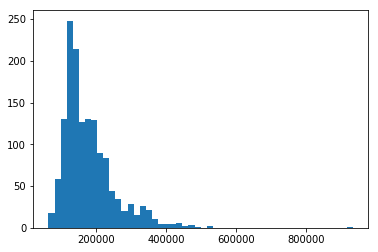

(1459, 1)

In [23]:
y_test_pred = reg.predict(X_test)
y_tot = np.exp(y_test_pred)
plt.hist(y_tot, bins=50)
plt.show()
y_tot.shape

In [24]:
submission = pd.DataFrame({"SalePrice": y_tot.ravel()}, index=X_test.index)
print(submission.head())
submission.to_csv('submission_housing.csv')

          SalePrice
Id                 
1461  124399.347958
1462  160488.771126
1463  179414.444052
1464  200348.321455
1465  200932.165371


## Optimizing RandomForest 

In [25]:
# Hyperparameter tuning by Grid Search
# rf = RandomForestRegressor(max_features='auto', oob_score=True,
#                            random_state=42, n_jobs=-1)
# param_grid = {"criterion": ["mse", "mae"],
#              "min_samples_leaf": [1, 5, 10],
#              "min_samples_split": [2, 4, 10, 12, 16],
#              "n_estimators": [50, 100, 400, 700, 1000]}
# gs = GridSearchCV(estimator=rf, param_grid=param_grid,
#                  scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
# gs = gs.fit(X_train, Y_train)

# print(gs.best_score_)
# print(gs.best_params_)

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Index(['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       'TotRmsAbvGrd', 'GarageArea', 'MiscVal', 'LogLotFrontage', 'LogLotArea',
       'MasVnrArea_log', 'WoodDeckSF', 'PoolArea', 'Neighborhood_tr_Med',
       'Neighborhood_tr_Poor', 'Neighborhood_tr_Rich', 'MasVnrType_tr_Cat1',
       'MasVnrType_tr_Cat2', 'MasVnrType_tr_Cat3', 'ExterCond_tr_Bad',
       'ExterCond_tr_Good', 'BsmtQual_tr_Avg', 'BsmtQual_tr_BelAv',
       'BsmtQual_tr_Good', 'BsmtQual_tr_nan', 'BsmtFinType1_tr_Avg',
       'BsmtFinType1_tr_Good', 'BsmtFinType1_tr_nan', 'HeatingQC_tr_Avg',
       'HeatingQC_tr_Ex', 'TotRooms_tr_Avg', 'TotRooms_tr_Few',
       'TotRooms_tr_Many', 'GarageCars_tr_Few', 'GarageCars_tr_Many',
       'GarageCars_tr_Some', 'Pool_tr_Ex', 'Pool_tr_No_Bad',
       'SaleType_tr_Typ1', 'SaleType_tr_Typ2', 'SaleType_tr_Typ3',
       'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Ki

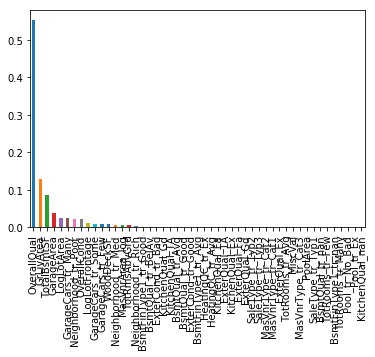

In [26]:
rf = RandomForestRegressor(criterion = 'mse', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 400,
                            max_features='auto', oob_score=True,
                            random_state=42, n_jobs=-1)
rf.fit(X_train, Y_train)

# Feature importance
features = X_train.columns
print(features)
feature_imp = pd.Series(rf.feature_importances_,
                        index=features).sort_values(ascending=False)
feature_imp.head()
plt.figure(2)
feature_imp.plot.bar()

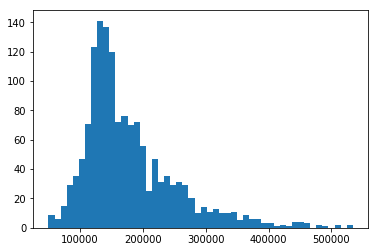

13.188516374500875


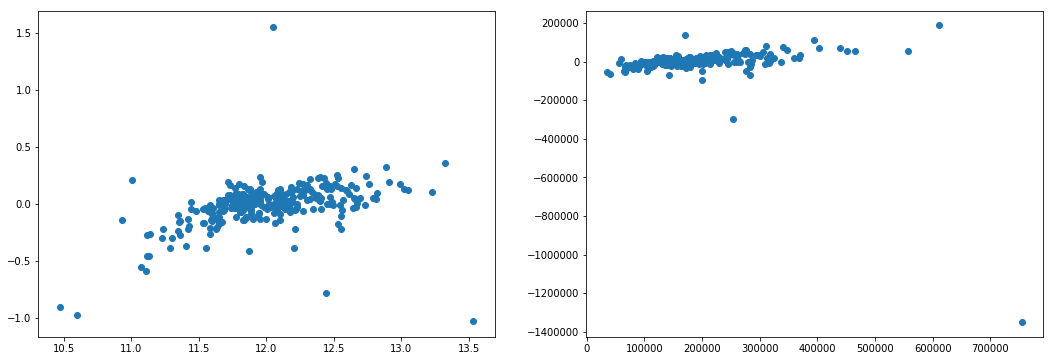

In [32]:
y_test_pred = rf.predict(X_test)
y_tot = np.exp(y_test_pred)
plt.hist(y_tot, bins=50)
plt.show()
y_tot.shape

# Residual plots
fig, axes = plt.subplots(1,2, figsize=(18, 6))
axes[0].scatter(y_cv, y_cv-y_pred)
axes[1].scatter(y_cv_tot, y_cv_tot-y_pred_tot)

print(max(y_test_pred))


In [33]:
submission = pd.DataFrame({"SalePrice": y_tot.ravel()}, index=X_test.index)
print(submission.head())
submission.to_csv('submission_housing_RF.csv')

          SalePrice
Id                 
1461  130363.958311
1462  160485.917011
1463  179026.708685
1464  187806.780968
1465  199448.565672


## Using keras Sequential model for a non-linear prediction

In [27]:
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
n = X_tr.columns.size

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape=(n,)))
model.add(Dense(1, activation = 'linear'))

model.summary()


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


### Compile and fit model

In [28]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_split = 0.2, verbose=0)
y_pred = model.predict(X_cv)
y_pred_tot = np.exp(y_pred).ravel() #*np.array((housing_train[["GrLivArea"]].loc[ind_cv])) +np.array(housing_train[["MiscVal"]].loc[ind_cv])
y_cv_tot = np.array(np.exp(y_cv)).ravel() #*np.array(housing_train[["GrLivArea"]].loc[ind_cv]) +np.array(housing_train[["MiscVal"]].loc[ind_cv])

score2 = (np.mean(np.abs(np.log(y_pred_tot)-np.log(y_cv_tot))))
print(score2)

0.11626637952418321


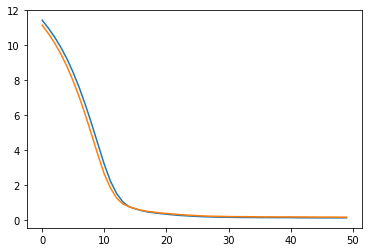

In [29]:
plt.plot(model.history.history["mean_absolute_error"])
plt.plot(model.history.history["val_mean_absolute_error"])
plt.show()

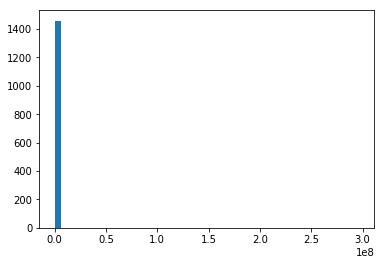

[19.507517]


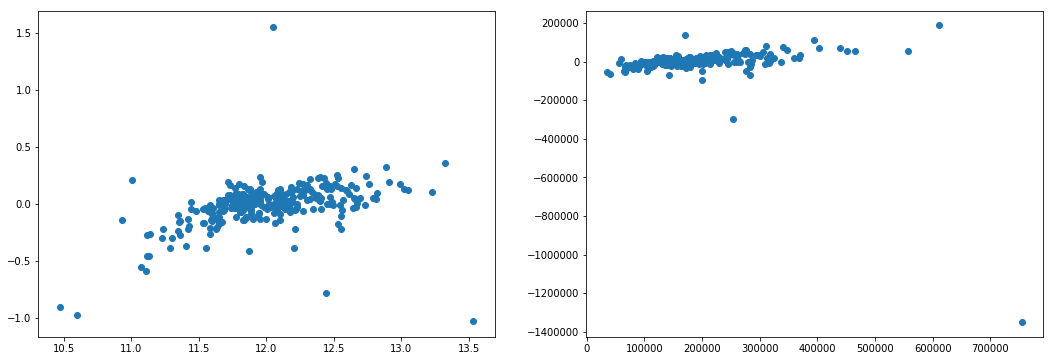

In [30]:
y_test_pred = model.predict(X_test)
y_tot = np.exp(y_test_pred)
plt.hist(y_tot, bins=50)
plt.show()
y_tot.shape

# Residual plots
fig, axes = plt.subplots(1,2, figsize=(18, 6))
axes[0].scatter(y_cv, y_cv-y_pred)
axes[1].scatter(y_cv_tot, y_cv_tot-y_pred_tot)

print(max(y_test_pred))

In [31]:
submission = pd.DataFrame({"SalePrice": y_tot.ravel()}, index=X_test.index)
print(submission.head())
submission.to_csv('submission_housing_NN.csv')

          SalePrice
Id                 
1461  128243.406250
1462  194625.421875
1463  181560.031250
1464  185429.890625
1465  191219.750000
